In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import fitsio
import healpy as hp
from astropy.table import Table
import os
import sys
sys.path.insert(0, '/home/aew492/lss-dipoles/code')
import tools

In [3]:
pkwargs = dict(coord=['C','G'], badcolor='w', unit='quasars per healpixel')

### data

#### mask

In [4]:
small_masks = fitsio.read('/home/aew492/lss-dipoles/data/catalogs/masks/mask_master_hpx_r1.0.fits') # binary: 1s and 0s
gal_plane_mask = tools.get_galactic_plane_mask(30)
mask = small_masks * gal_plane_mask

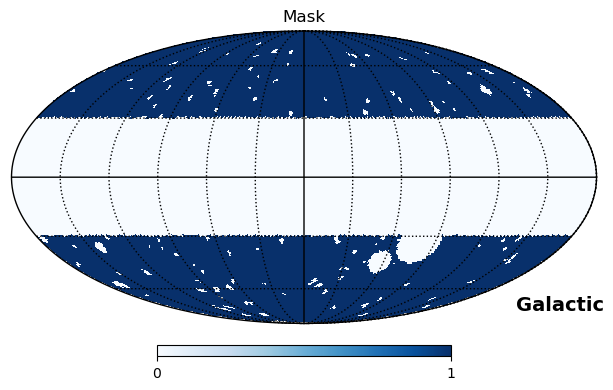

In [6]:
fig = plt.figure(figsize=(12,4))
hp.mollview(mask, cmap='Blues', coord=['C','G'], title='Mask', sub=(1,2,1))
hp.graticule()

#### Quaia G<20.0

In [7]:
datamap = tools.load_catalog_as_map('/home/aew492/lss-dipoles/data/catalogs/quaia/quaia_G20.0.fits').astype(float)
print(sum(datamap==0.))
masked_zeros_datamap = datamap.copy()
masked_zeros_datamap[datamap==0.] = np.nan
masked_datamap = datamap.copy()
masked_datamap[mask==0.] = np.nan

6745


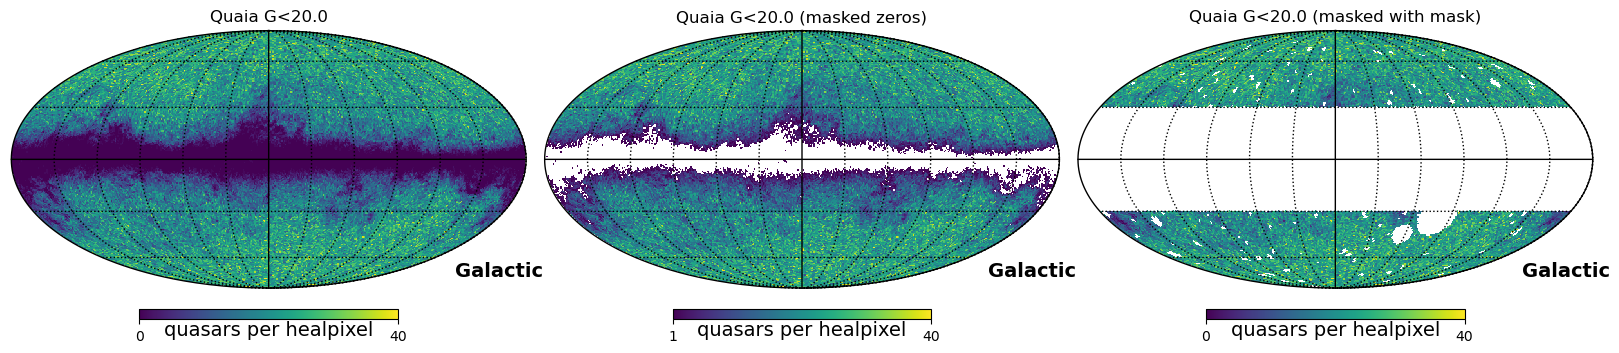

In [15]:
fig = plt.figure(figsize=(16,4))
hp.mollview(datamap, title='Quaia G<20.0', sub=(1,3,1), max=40, **pkwargs)
hp.mollview(masked_zeros_datamap, title='Quaia G<20.0 (masked zeros)', sub=(1,3,2), max=40, **pkwargs)
hp.mollview(masked_datamap, title='Quaia G<20.0 (masked with mask)', sub=(1,3,3), max=40, **pkwargs)
hp.graticule()

#### CatWISE

In [31]:
datamap = tools.load_catalog_as_map('/home/aew492/lss-dipoles/data/catalogs/catwise_agns/catwise_agns_master.fits').astype(float)
print(sum(datamap==0.))
masked_zeros_datamap = datamap.copy()
masked_zeros_datamap[datamap==0.] = np.nan
masked_datamap = datamap.copy()
masked_datamap[mask==0.] = np.nan

0


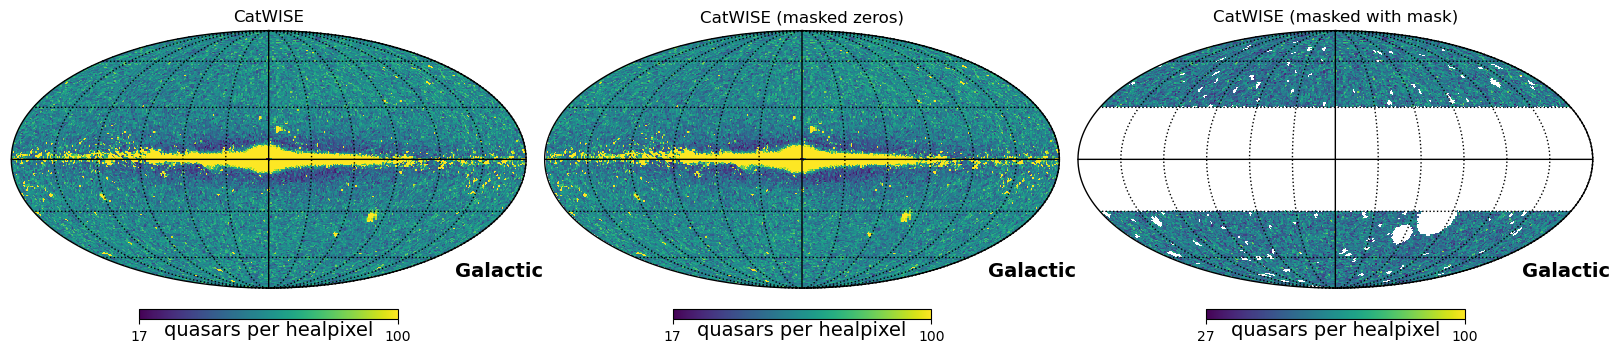

In [33]:
fig = plt.figure(figsize=(16,4))
hp.mollview(datamap, title='CatWISE', sub=(1,3,1), max=100, **pkwargs)
hp.mollview(masked_zeros_datamap, title='CatWISE (masked zeros)', sub=(1,3,2), max=100, **pkwargs)
hp.mollview(masked_datamap, title='CatWISE (masked with mask)', sub=(1,3,3), max=100, **pkwargs)
hp.graticule()

### mocks

In [34]:
ntrials = 12

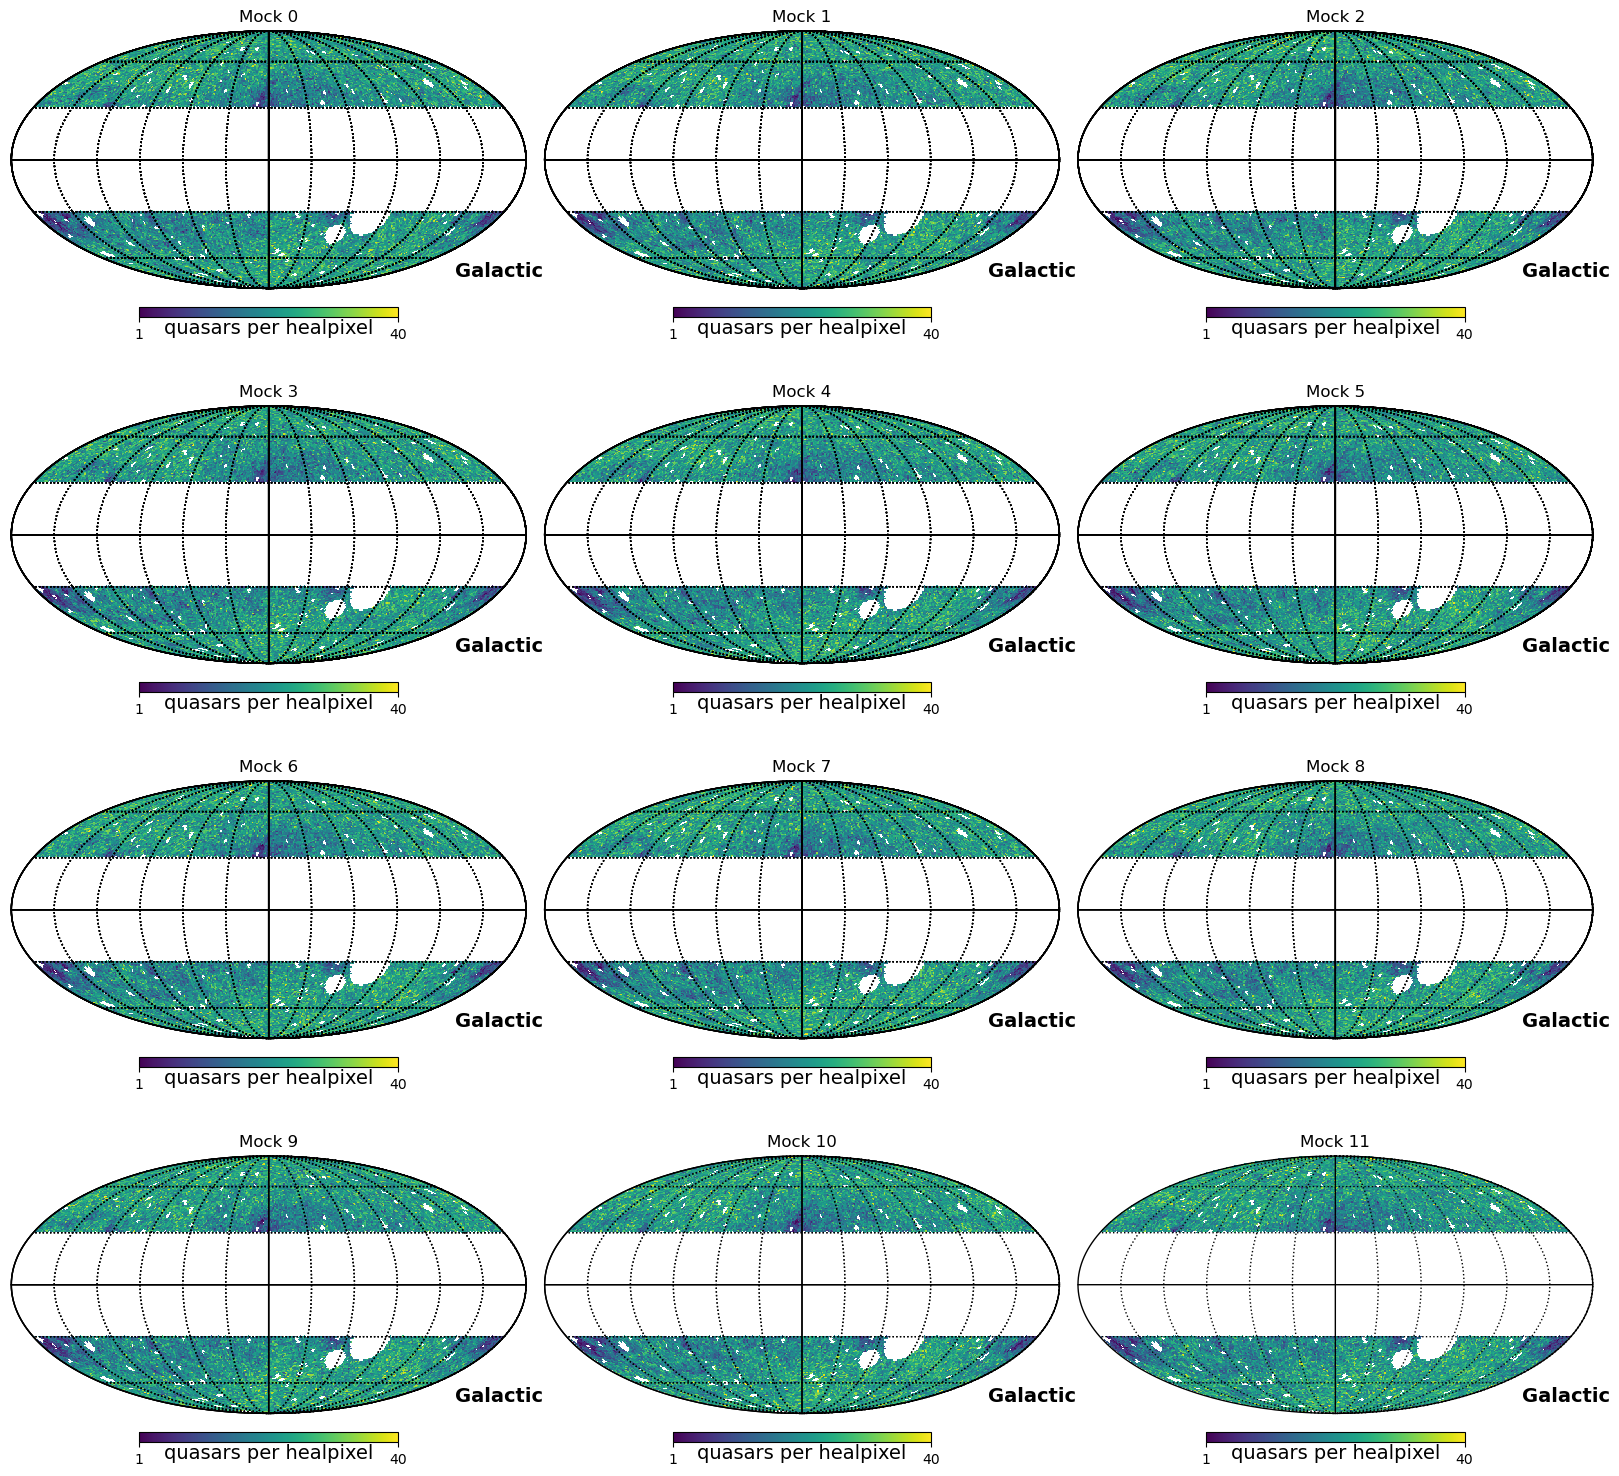

In [35]:
fig = plt.figure(figsize=(16,15))
for i in range(ntrials):
    mock = np.load(f'/home/aew492/lss-dipoles/data/mocks/mock_case-excess-quaia_G20.0_orig-0.0052-33.680_trial{i:03d}.npy').astype(float)
    mock[mock==0.] = np.nan
    hp.mollview(mock, sub=(4,3,i+1), title=f'Mock {i}', max=40, **pkwargs)
    hp.graticule()

In [ ]:
fig = plt.figure(figsize=(16,15))
for i in range(ntrials):
    mock = np.load(f'/home/aew492/lss-dipoles/data/mocks/mock_case-excess-quaia_G20.0_orig-0.0052-33.680_trial{i:03d}.npy').astype(float)
    mock[mock==0.] = np.nan
    hp.mollview(mock, sub=(4,3,i+1), title=f'Mock {i}', max=40, **pkwargs)
    hp.graticule()